## Importing the Libraries 

In [1]:
import numpy as np 
import pandas as pd 

## QUESTION #1

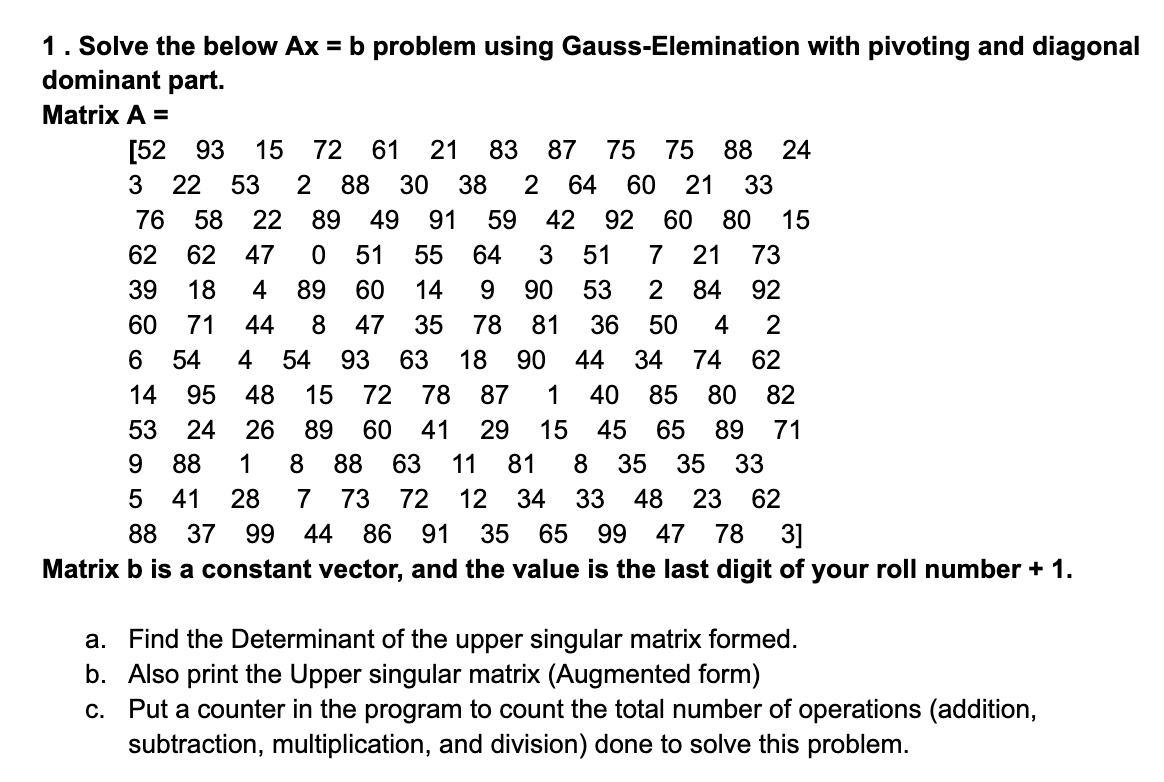


In [13]:

def gauss_elimination_with_pivoting(A, b):
    n = len(A)
    Ab = [A[i] + [b[i]] for i in range(n)]
    counter = 0
    
    for i in range(n):
        # Pivoting
        max_row = max(range(i, n), key=lambda r: abs(Ab[r][i]))
        
        if i != max_row:
            Ab[i], Ab[max_row] = Ab[max_row], Ab[i]
            b[i], b[max_row] = b[max_row], b[i]
            counter += 2 * (n + 1)  # Swap operation includes both row and b
        
        # Elimination
        for j in range(i + 1, n):
            factor = Ab[j][i] / Ab[i][i]
            counter += 1  # Division
            
            for k in range(i, n + 1):
                Ab[j][k] -= factor * Ab[i][k]
                counter += 2  # Multiplication and subtraction

            b[j] -= factor * b[i]
            counter += 2  # Multiplication and subtraction
    
    # Extracting upper triangular matrix and the determinant
    U = [row[:-1] for row in Ab]
    det = 1
    for i in range(n):
        det *= U[i][i]
        counter += 1  # Multiplication
    
    # Back Substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum_ax = 0
        for j in range(i + 1, n):
            sum_ax += Ab[i][j] * x[j]
            counter += 2  # Multiplication and addition
            
        x[i] = (b[i] - sum_ax) / Ab[i][i]
        counter += 2  # Subtraction and division
    
    return x, U, det, counter

# Defining matrix A
A = [
    [52, 93, 15, 72, 61, 21, 83, 87, 75, 75, 88, 24],
    [3, 22, 53, 2, 88, 30, 38, 2, 64, 60, 21, 33],
    [76, 58, 22, 89, 49, 91, 59, 42, 92, 60, 80, 15],
    [62, 62, 47, 0, 51, 55, 64, 3, 51, 7, 21, 73],
    [39, 18, 4, 89, 60, 14, 9, 90, 53, 2, 84, 92],
    [60, 71, 44, 8, 47, 35, 78, 81, 36, 50, 4, 2],
    [6, 54, 4, 54, 93, 63, 18, 90, 44, 34, 74, 62],
    [14, 95, 48, 15, 72, 78, 87, 1, 40, 85, 80, 82],
    [53, 24, 26, 89, 60, 41, 29, 15, 45, 65, 89, 71],
    [9, 88, 1, 8, 88, 63, 11, 81, 8, 35, 35, 33],
    [5, 41, 28, 7, 73, 72, 12, 34, 33, 48, 23, 62],
    [88, 37, 99, 44, 86, 91, 35, 65, 99, 47, 78, 3]
]

roll_number_last_digit = 2
b = [roll_number_last_digit + 1] * len(A)

x, U, det, counter = gauss_elimination_with_pivoting(A, b)


# Converting to DataFrame for better visualization
df_A = pd.DataFrame(A , index=[i for i in range(1,13)] , columns=[i for i in range(1,13)])
df_b = pd.DataFrame(b , columns=["b_1"] , index=[i for i in range(1,13)])
df_x = pd.DataFrame(x , index=[i for i in range(1,13)] , columns=["x"])
df_U = pd.DataFrame(U , columns=[f"A_{i}" for i in range(1,13)] , index=[i for i in range(1,13)])



print(" Part a : Determinant of U:", det)



 Part a : Determinant of U: -1.5805317474094235e+21


In [14]:
augmented_matrix = pd.concat([df_U,df_b], axis = 1 )
augmented_matrix

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,b_1
1,8.800000e+01,3.700000e+01,9.900000e+01,44.000000,86.000000,91.000000,3.500000e+01,65.000000,99.000000,47.000000,78.000000,3.000000,3.000000
2,0.000000e+00,8.911364e+01,3.225000e+01,8.000000,58.318182,63.522727,8.143182e+01,-9.340909,24.250000,77.522727,67.590909,81.522727,2.522727
3,0.000000e+00,0.000000e+00,-7.292578e+01,48.661821,-42.317521,-6.156848,4.972456e+00,-11.406274,-0.587605,-3.248661,-7.118592,-11.417751,-0.328233
4,0.000000e+00,0.000000e+00,0.000000e+00,-58.083346,-12.358394,-31.708311,4.068636e+00,-33.436872,-28.239839,-55.779109,-57.718048,43.613131,0.030090
5,0.000000e+00,0.000000e+00,-3.552714e-15,0.000000,59.021883,4.375351,-3.063450e+01,75.821686,7.801029,-43.872526,-0.186406,42.162928,1.451042
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-74.422879,-5.163999e+00,63.976810,0.215745,-1.367926,1.279013,-40.680557,-0.606421
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-4.724421e+01,46.439718,-16.951751,27.605900,-2.357614,-104.590004,-0.924029
8,0.000000e+00,-2.220446e-16,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-76.804175,-43.333713,24.244628,3.333522,66.838732,0.780331
9,7.105427e-15,0.000000e+00,7.105427e-15,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-56.980701,49.766326,-25.207462,-5.230967,0.818442
10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,93.955524,-50.083489,-132.131889,0.530468


In [15]:
print(" Part c : Counter of Number of operations:", counter)    

 Part c : Counter of Number of operations: 1876


In [16]:
print(" Part d : Solution of the system of equations:")
df_x

 Part d : Solution of the system of equations:


,x
1,-0.042898
2,0.068700
3,0.074447
4,0.101466
5,0.008687
6,-0.005784
7,-0.018542
8,-0.011006
9,-0.000877
10,-0.019279


## QUESTION #2 


# Solving a System of Equations Using Gauss-Jordan Elimination

## Problem Statement

We need to solve the following system of equations to find the unknown molar flow rates \( D1, B1, D2, \) and \( B2 \) based on the given component compositions and feed rate.

### Given Data:

- **Feed Composition**:
  - Xylene: 15%
  - Styrene: 25%
  - Toluene: 40%
  - Benzene: 20%
  
- **Feed Rate**:
  \[ F = 70 \, \text{kmol/hr} \]

- **Component Compositions in Streams**:
  - \( D1 \):
    - Xylene: 7%
    - Styrene: 4%
    - Toluene: 54%
    - Benzene: 35%
    
  - \( B1 \):
    - Xylene: 18%
    - Styrene: 24%
    - Toluene: 42%
    - Benzene: 16%
    
  - \( D2 \):
    - Xylene: 15%
    - Styrene: 10%
    - Toluene: 54%
    - Benzene: 21%
    
  - \( B2 \):
    - Xylene: 24%
    - Styrene: 65%
    - Toluene: 10%
    - Benzene: 1%

## Forming the Matrices

### Mass Balance Equations for Each Component:

#### Xylene:
\[  0.07D1 + 0.18B1 + 0.15D2 + 0.24B2 = 0.15F  \]

#### Styrene:
\[ 0.04D1 + 0.24B1 + 0.10D2 + 0.65B2 = 0.25F   \]

#### Toluene:
\[  0.54D1 + 0.42B1 + 0.54D2 + 0.10B2 = 0.40F  \]

#### Benzene:
\[  0.35D1 + 0.16B1 + 0.21D2 + 0.01B2  = 0.20F \]

### Matrix Form:

We can represent these equations in matrix form \( A x = b \):


- A matrix is as follows :
\begin{bmatrix}
0.07 & 0.18 & 0.15 & 0.24 \\
0.04 & 0.24 & 0.10 & 0.65 \\
0.54 & 0.42 & 0.54 & 0.10 \\
0.35 & 0.16 & 0.21 & 0.01
\end{bmatrix}

- b Matrix is as follows :
\begin{bmatrix}
0.15 \times 70 \\
0.25 \times 70 \\
0.40 \times 70 \\
0.20 \times 70
\end{bmatrix}

\begin{bmatrix}
10.5 \\
17.5 \\
28 \\
14
\end{bmatrix}

- x Matrix is as follows :
\begin{bmatrix}
D1 \\
B1 \\
D2 \\
B2
\end{bmatrix}

- Other Relations are as follows : 
  - D = D_1 + B_1 
  - B = D_2 + B_2 


In [17]:
F = 70 # Flowrate 

# Define the 4x4 A matrix for the combined system
A_2 = np.array([
    [0.07, 0.18, 0.15, 0.24],
    [0.04, 0.24, 0.10, 0.65],
    [0.54, 0.42, 0.54, 0.10],
    [0.35, 0.16, 0.21, 0.01]
])

#  x = D1 , B1 , D2 , B2

# Define the b vector
b_2= np.array([
    0.15 * F,
    0.25 * F,
    0.40 * F,
    0.20 * F
])

# Solve the system of equations
def gauss_jordan(A, b):
    n = len(b)
    # Form the augmented matrix [A|b]
    Ab = np.hstack([A, b.reshape(-1, 1)])

    for i in range(n):
        # Make the diagonal contain all 1's
        Ab[i] = Ab[i] / Ab[i][i]
        for j in range(n):
            if i != j:
                # Make the other elements in column i be 0
                Ab[j] = Ab[j] - Ab[j][i] * Ab[i]

    # Extract the solution
    x = Ab[:, -1]
    return x

x = gauss_jordan(A_2, b_2)
solution = pd.DataFrame(x, index=['D1', 'B1', 'D2', 'B2'], columns=['Flowrate'])
D = x[0] + x[1]
B = x[2] + x[3]

# Add a new row for the total flowrate
solution.loc['D'] = D
solution.loc['B'] = B
solution.loc['Total / F'] = D+B

solution

,Flowrate
D1,26.25
B1,17.50
D2,8.75
B2,17.50
D,43.75
B,26.25
Total / F,70.00
